In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the data from the CSV file to see its structure and content
data_path = '/Users/siqinlilv/Desktop/Energy and Transport Analytics/updated_result_emssion.csv'
emission_data = pd.read_csv(data_path)
emission_data.head()


,Count_point_id,hour,Total_Emissions_60s,Hour,Green_Time,Total_Emissions_Optimized,Emission_Reduction,Longitude,Latitude
0,6001,7,67774.0,7,120,135548.000000,-67774.000000,-0.265315,51.634686
1,6001,8,56580.0,8,120,113160.000000,-56580.000000,-0.265315,51.634686
2,6001,9,46973.0,9,46,36012.633333,10960.366667,-0.265315,51.634686
3,6001,17,58288.0,17,7,6800.266667,51487.733333,-0.265315,51.634686
4,6001,18,53299.0,18,7,6218.216667,47080.783333,-0.265315,51.634686


/var/folders/d3/mnnr4rtn1zb5wkz6xf4ytftc0000gn/T/ipykernel_70890/2849994270.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  london_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')).loc[[110]]


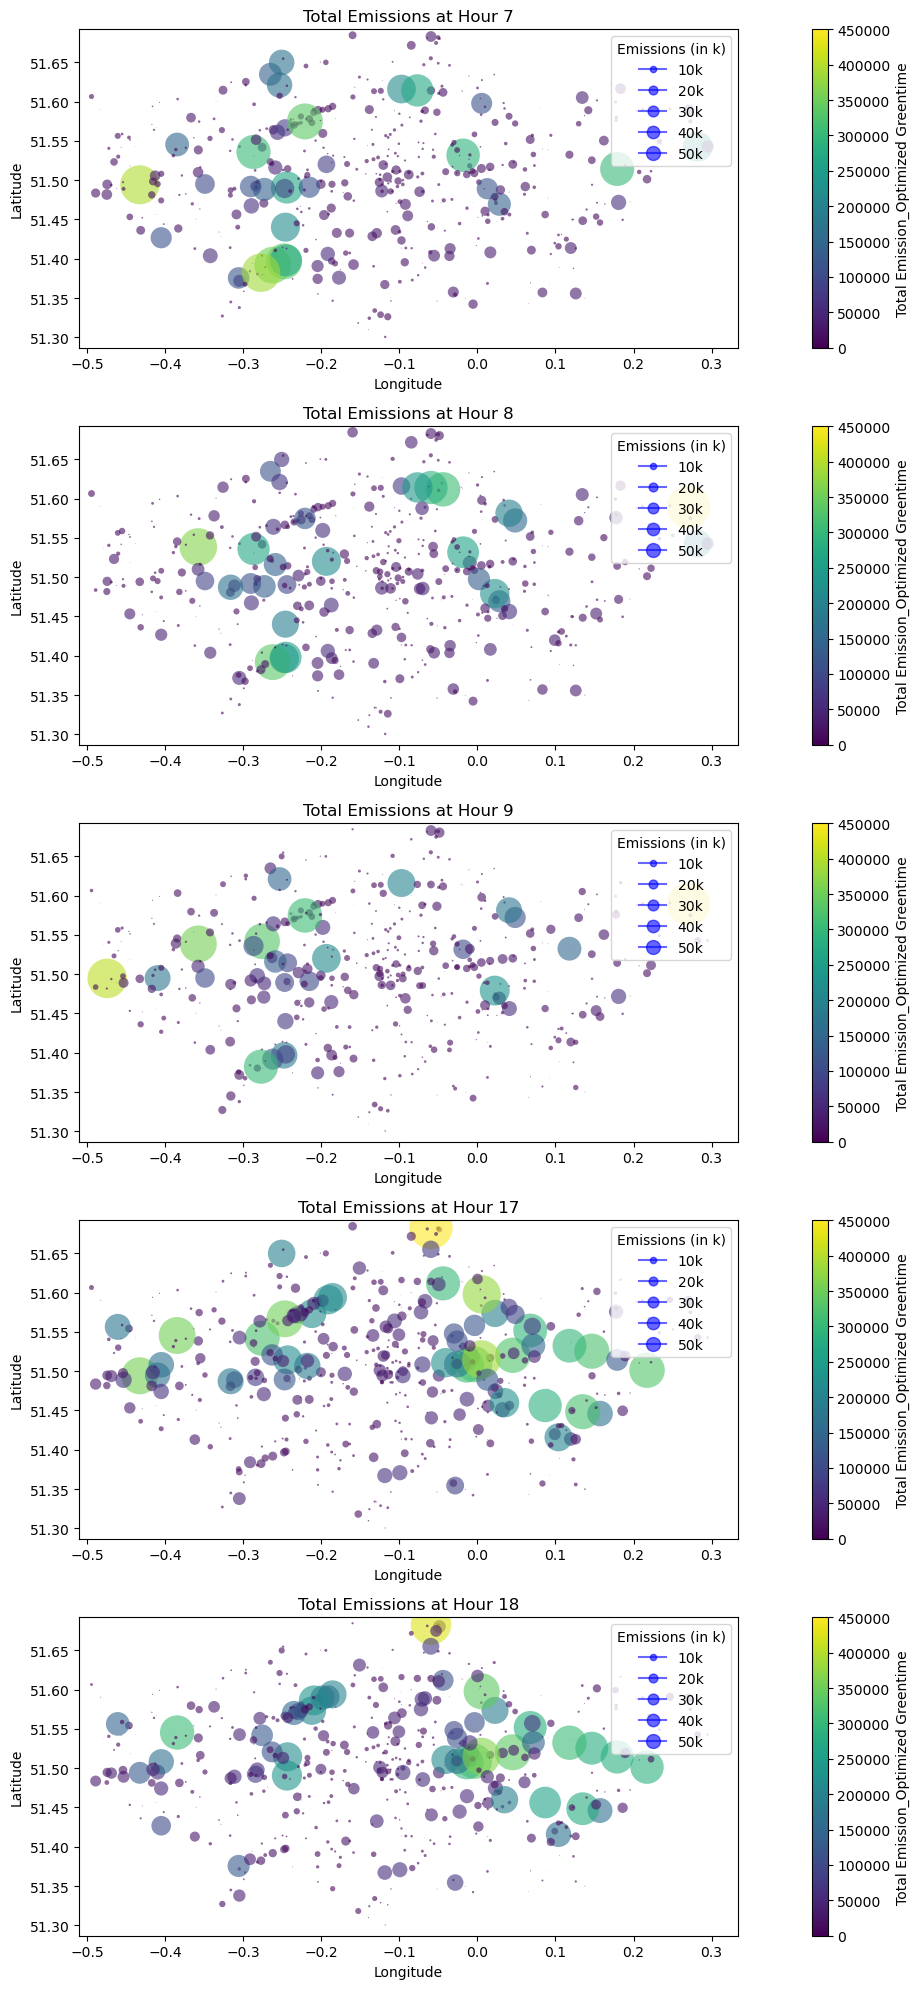

In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

# 加载数据
data_path = '/Users/siqinlilv/Desktop/Energy and Transport Analytics/updated_result_emssion.csv'
emission_data = pd.read_csv(data_path)

# 只选择指定小时和年份的数据
hours = [7, 8, 9, 17, 18]
emission_data_filtered = emission_data[emission_data['hour'].isin(hours)]

# 加载伦敦地图
london_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')).loc[[110]]

# 设置气泡大小的比例因子
bubble_size_factor = 500

# 为图例准备排放量标签（单位：千）
legend_labels = [10, 20, 30, 40, 50]

# 设置颜色规范化的固定范围
min_emission = 0  # 最小排放量
max_emission = 450000  # 最大排放量
norm = plt.Normalize(min_emission, max_emission)
cmap = plt.cm.viridis

# 生成图表
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 20), subplot_kw={'aspect': 'equal'})

for i, hour in enumerate(hours):
    # 筛选指定时段的数据
    hour_data = emission_data_filtered[emission_data_filtered['hour'] == hour]
    
    # 绘制气泡图
    london_map.plot(ax=axs[i], color='lightgrey')
    scatter = axs[i].scatter(hour_data['Longitude'], hour_data['Latitude'], 
                             s=hour_data['Total_Emissions_Optimized']/bubble_size_factor, 
                             c=hour_data['Total_Emissions_Optimized'], cmap=cmap, norm=norm, alpha=0.6, edgecolors='none')
    axs[i].set_title(f"Total Emissions at Hour {hour}")
    axs[i].set_xlim((-0.5103751, 0.3340155))
    axs[i].set_ylim((51.2867602, 51.6918741))
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')

    # 添加图例
    handles = [plt.Line2D([], [], marker='o', color='blue', 
                          markersize=sqrt(label*1000/bubble_size_factor), 
                          alpha=0.6, label=f'{label}k') for label in legend_labels]
    axs[i].legend(handles=handles, title="Emissions (in k)", loc='upper right')

    # 添加颜色条
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=axs[i], orientation='vertical', label='Total Emission_Optimized Greentime')

# 调整子图间的间距
fig.subplots_adjust(hspace=0.5)

plt.tight_layout()
plt.show()


/var/folders/d3/mnnr4rtn1zb5wkz6xf4ytftc0000gn/T/ipykernel_70890/2154437529.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  london_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')).loc[[110]]


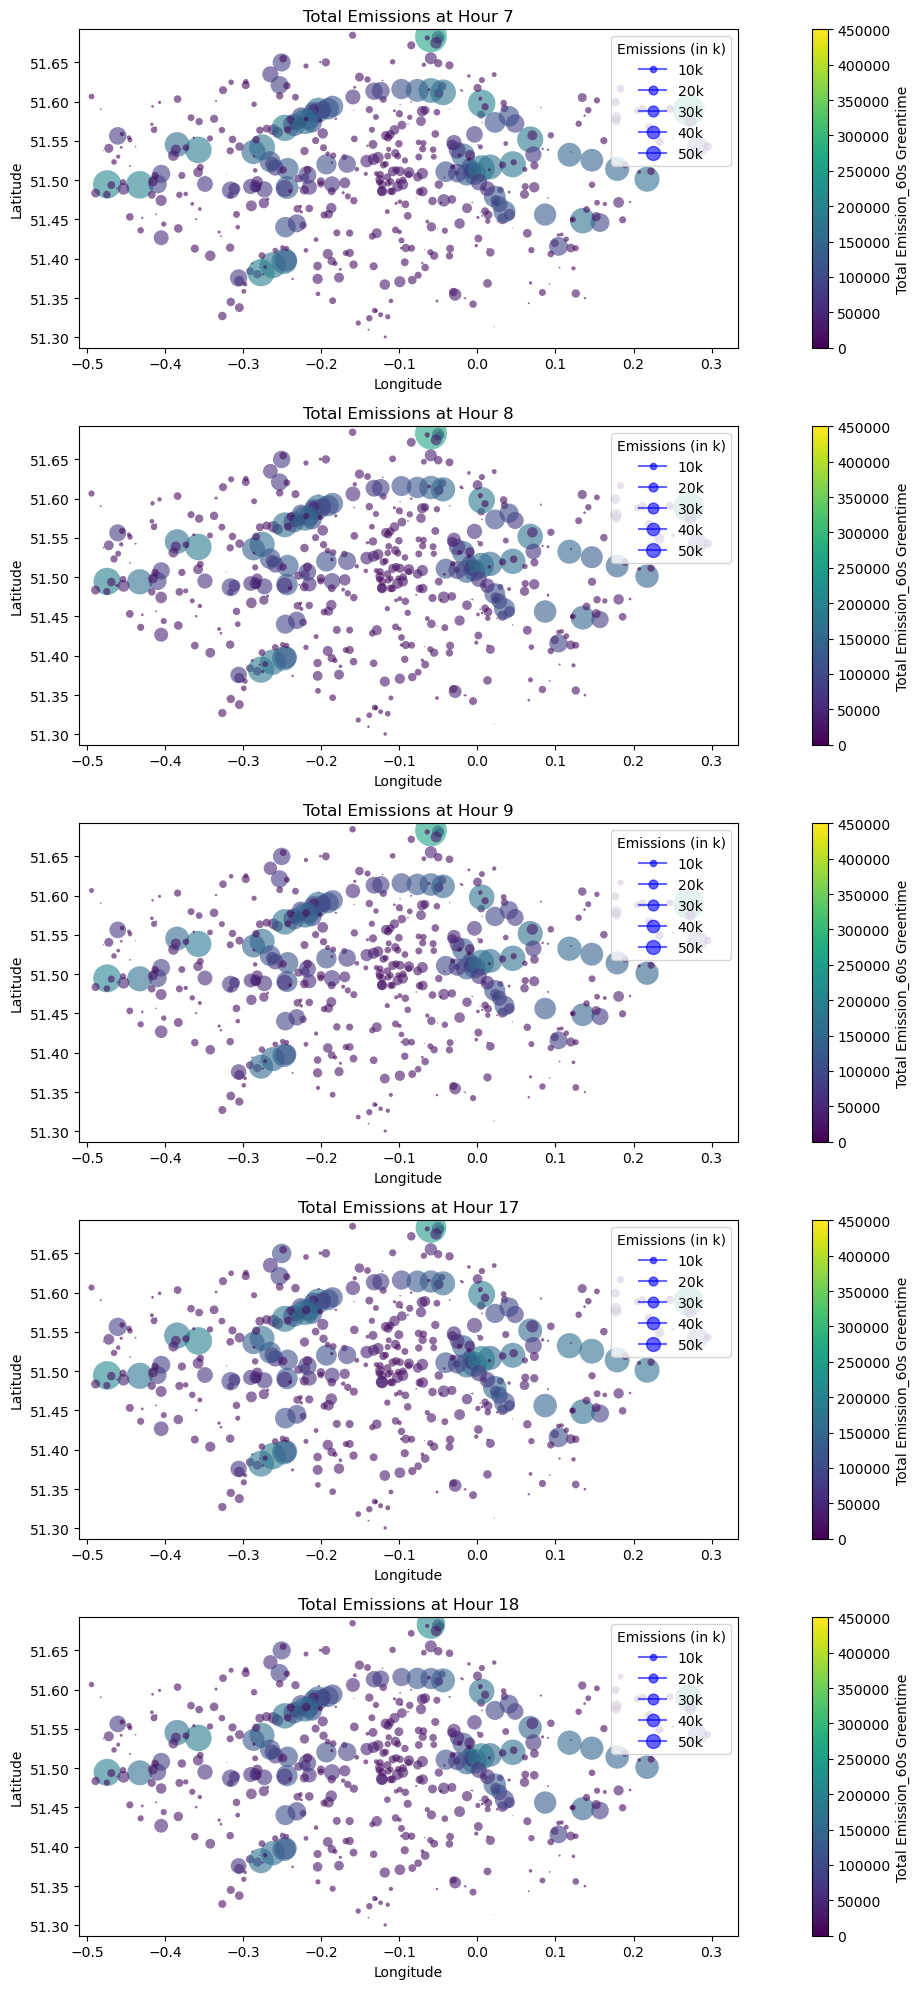

In [21]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

# 加载数据
data_path = '/Users/siqinlilv/Desktop/Energy and Transport Analytics/updated_result_emssion.csv'
emission_data = pd.read_csv(data_path)

# 只选择指定小时和年份的数据
hours = [7, 8, 9, 17, 18]
emission_data_filtered = emission_data[emission_data['hour'].isin(hours)]

# 加载伦敦地图
london_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')).loc[[110]]

# 设置气泡大小的比例因子
bubble_size_factor = 500

# 为图例准备排放量标签（单位：千）
legend_labels = [10, 20, 30, 40, 50]

# 设置颜色规范化的固定范围
min_emission = 0  # 最小排放量
max_emission = 450000  # 最大排放量
norm = plt.Normalize(min_emission, max_emission)
cmap = plt.cm.viridis

# 生成图表
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 20), subplot_kw={'aspect': 'equal'})

for i, hour in enumerate(hours):
    # 筛选指定时段的数据
    hour_data = emission_data_filtered[emission_data_filtered['hour'] == hour]
    
    # 绘制气泡图
    london_map.plot(ax=axs[i], color='lightgrey')
    scatter = axs[i].scatter(hour_data['Longitude'], hour_data['Latitude'], 
                             s=hour_data['Total_Emissions_60s']/bubble_size_factor, 
                             c=hour_data['Total_Emissions_60s'], cmap=cmap, norm=norm, alpha=0.6, edgecolors='none')
    axs[i].set_title(f"Total Emissions at Hour {hour}")
    axs[i].set_xlim((-0.5103751, 0.3340155))
    axs[i].set_ylim((51.2867602, 51.6918741))
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')

    # 添加图例
    handles = [plt.Line2D([], [], marker='o', color='blue', 
                          markersize=sqrt(label*1000/bubble_size_factor), 
                          alpha=0.6, label=f'{label}k') for label in legend_labels]
    axs[i].legend(handles=handles, title="Emissions (in k)", loc='upper right')

    # 添加颜色条
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=axs[i], orientation='vertical', label='Total Emission_60s Greentime')

# 调整子图间的间距
fig.subplots_adjust(hspace=0.5)

plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

# 加载数据
data_path = '/Users/siqinlilv/Desktop/Energy and Transport Analytics/updated_result_emssion.csv'
emission_data = pd.read_csv(data_path)

# 只选择指定小时和年份的数据
hours = [7, 8, 9, 17, 18]
emission_data_filtered = emission_data[emission_data['hour'].isin(hours)]

# 加载伦敦地图
london_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')).loc[[110]]

# 设置气泡大小的比例因子
bubble_size_factor = 500

# 为图例准备排放量标签（单位：千）
legend_labels = [10, 20, 30, 40, 50]

# 设置颜色规范化的固定范围，确保是对称的
min_emission = -max(abs(emission_data_filtered['Total_Emissions_Optimized'].min()), 
                    abs(emission_data_filtered['Total_Emissions_Optimized'].max()))
max_emission = -min_emission
norm = plt.Normalize(min_emission, max_emission)
cmap = plt.cm.RdBu  # 使用红蓝双色颜色映射

# 生成图表
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 20), subplot_kw={'aspect': 'equal'})

for i, hour in enumerate(hours):
    # 筛选指定时段的数据
    hour_data = emission_data_filtered[emission_data_filtered['hour'] == hour]
    
    # 绘制气泡图
    london_map.plot(ax=axs[i], color='lightgrey')
    scatter = axs[i].scatter(hour_data['Longitude'], hour_data['Latitude'], 
                             s=hour_data['Emission_Reduction']/bubble_size_factor, 
                             c=hour_data['Emission_Reduction'], cmap=cmap, norm=norm, alpha=0.6, edgecolors='none')
    axs[i].set_title(f"Total Emissions at Hour {hour}")
    axs[i].set_xlim((-0.5103751, 0.3340155))
    axs[i].set_ylim((51.2867602, 51.6918741))
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')

    # 添加图例
    handles = [plt.Line2D([], [], marker='o', color='blue', 
                          markersize=sqrt(label*1000/bubble_size_factor), 
                          alpha=0.6, label=f'{label}k') for label in legend_labels]
    axs[i].legend(handles


SyntaxError: incomplete input (410621594.py, line 53)

/var/folders/d3/mnnr4rtn1zb5wkz6xf4ytftc0000gn/T/ipykernel_70890/2376057228.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  london_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')).loc[[110]]
/Users/siqinlilv/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/siqinlilv/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/siqinlilv/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/siqinlilv/anacon

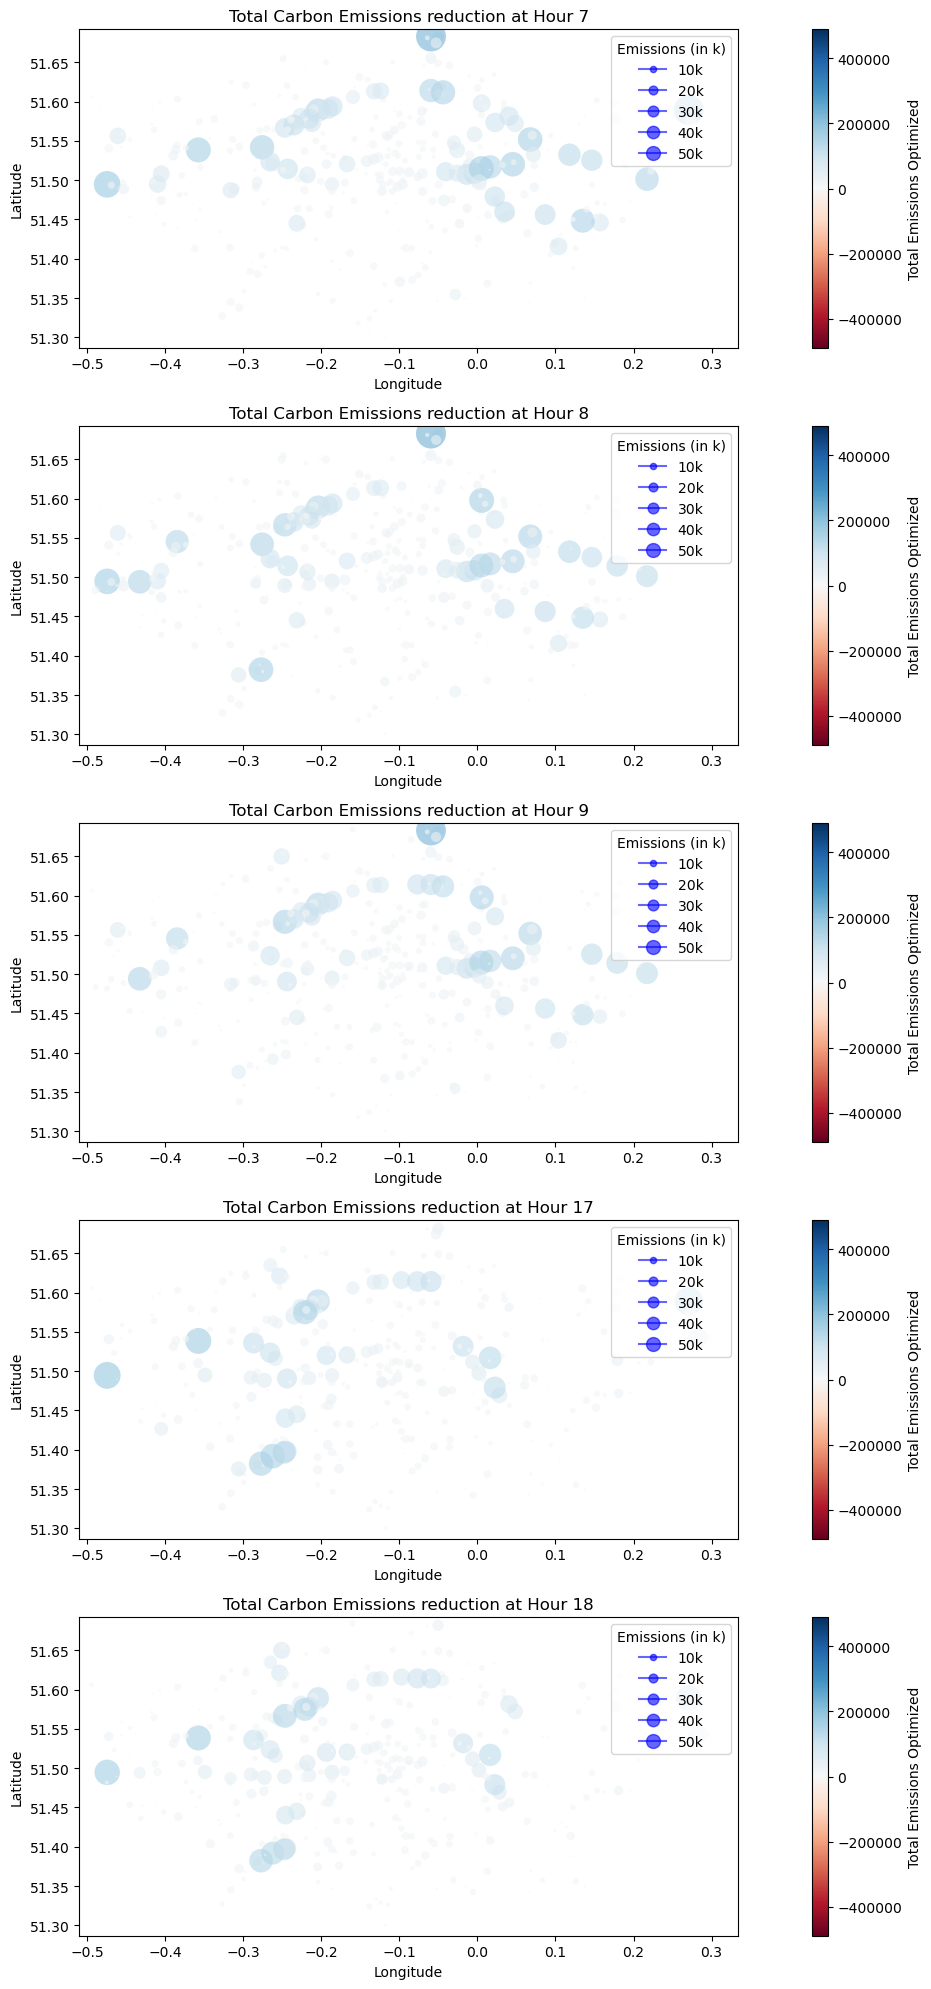

In [24]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

# 加载数据
data_path = '/Users/siqinlilv/Desktop/Energy and Transport Analytics/updated_result_emssion.csv'
emission_data = pd.read_csv(data_path)

# 只选择指定小时和年份的数据
hours = [7, 8, 9, 17, 18]
emission_data_filtered = emission_data[emission_data['hour'].isin(hours)]

# 加载伦敦地图
london_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')).loc[[110]]

# 设置气泡大小的比例因子
bubble_size_factor = 500

# 为图例准备排放量标签（单位：千）
legend_labels = [10, 20, 30, 40, 50]

# 设置颜色规范化的固定范围，确保是对称的
min_emission = -max(abs(emission_data_filtered['Total_Emissions_Optimized'].min()), 
                    abs(emission_data_filtered['Total_Emissions_Optimized'].max()))
max_emission = -min_emission
norm = plt.Normalize(min_emission, max_emission)
cmap = plt.cm.RdBu  # 使用红蓝双色颜色映射

# 生成图表
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 20), subplot_kw={'aspect': 'equal'})

for i, hour in enumerate(hours):
    # 筛选指定时段的数据
    hour_data = emission_data_filtered[emission_data_filtered['hour'] == hour]
    
    # 绘制气泡图
    london_map.plot(ax=axs[i], color='lightgrey')
    scatter = axs[i].scatter(hour_data['Longitude'], hour_data['Latitude'], 
                             s=hour_data['Emission_Reduction']/bubble_size_factor, 
                             c=hour_data['Emission_Reduction'], cmap=cmap, norm=norm, alpha=0.6, edgecolors='none')
    axs[i].set_title(f"Total Carbon Emissions reduction at Hour {hour}")
    axs[i].set_xlim((-0.5103751, 0.3340155))
    axs[i].set_ylim((51.2867602, 51.6918741))
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')

    # 添加图例
    handles = [plt.Line2D([], [], marker='o', color='blue', 
                          markersize=sqrt(label * 1000 / bubble_size_factor), 
                          alpha=0.6, label=f'{label}k') for label in legend_labels]
    axs[i].legend(handles=handles, title="Emissions (in k)", loc='upper right')

    # 添加颜色条
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=axs[i], orientation='vertical', label='Total Emissions Optimized')

# 调整子图间的间距
fig.subplots_adjust(hspace=0.5)

plt.tight_layout()
plt.show()


/var/folders/d3/mnnr4rtn1zb5wkz6xf4ytftc0000gn/T/ipykernel_70890/1257360729.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  london_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')).loc[[110]]


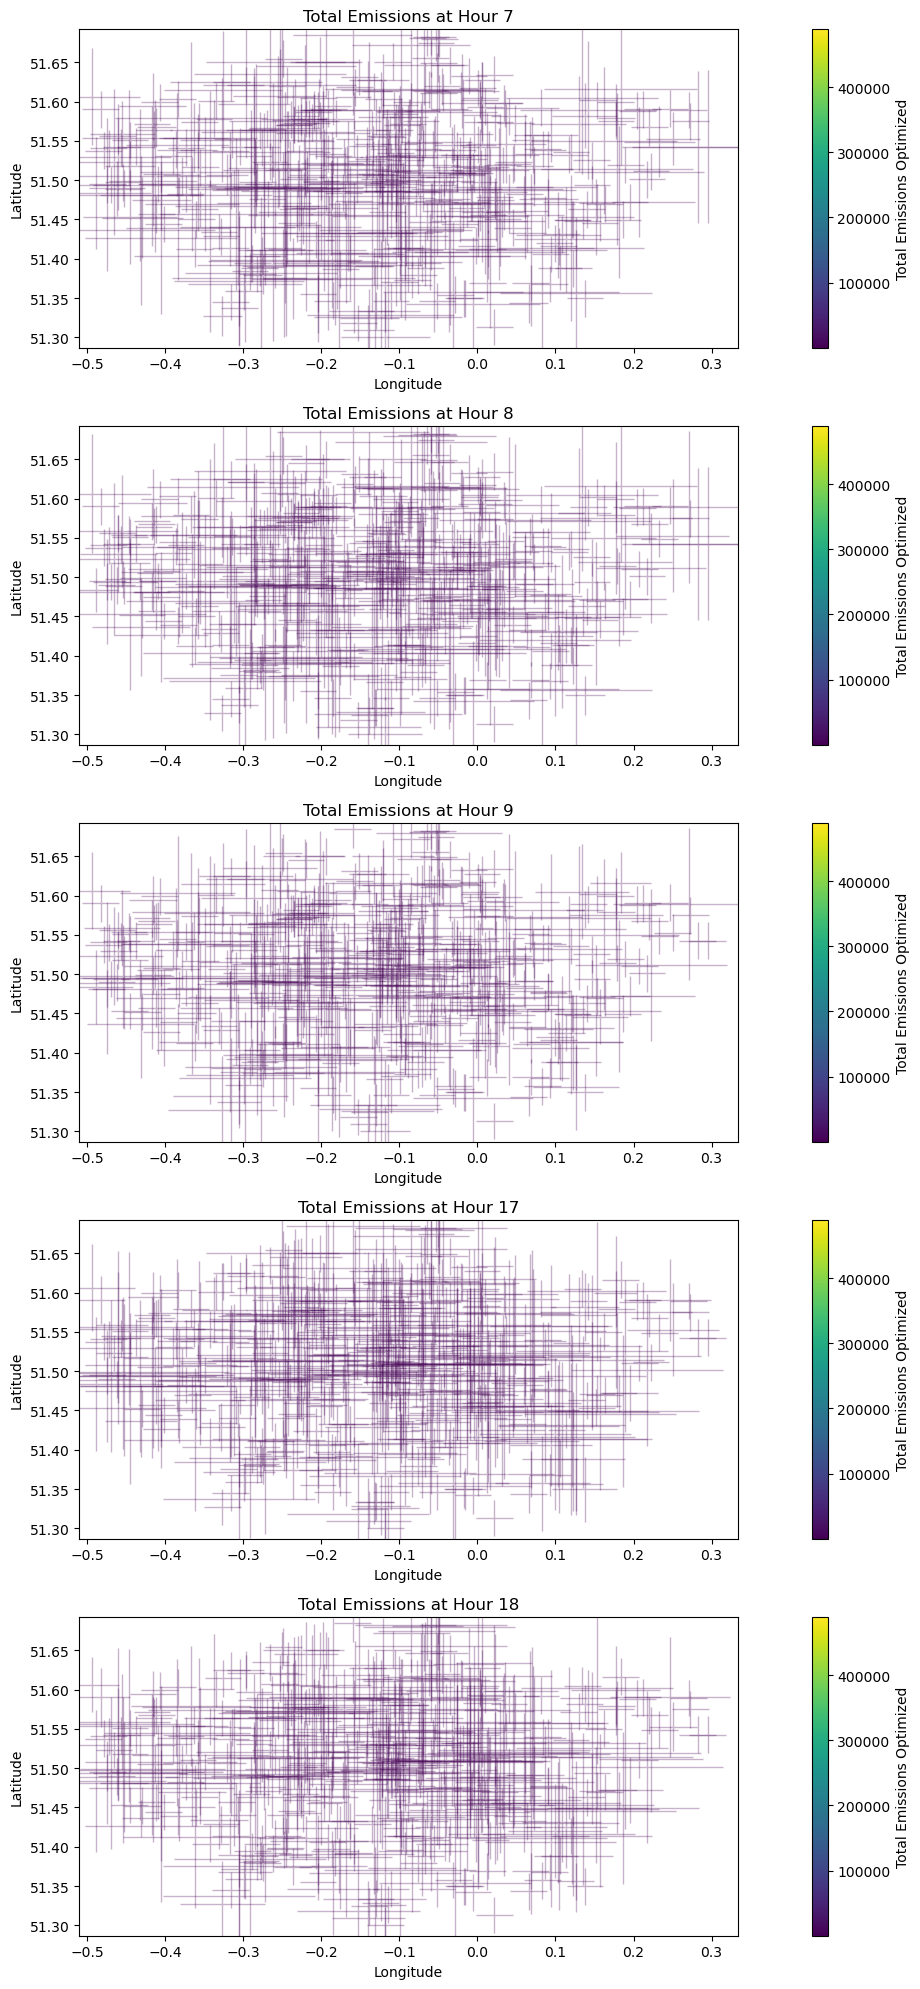

In [26]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

# 加载数据
data_path = '/Users/siqinlilv/Desktop/Energy and Transport Analytics/updated_result_emssion.csv'
emission_data = pd.read_csv(data_path)

# 只选择指定小时和年份的数据
hours = [7, 8, 9, 17, 18]
emission_data_filtered = emission_data[emission_data['hour'].isin(hours)]

# 加载伦敦地图
london_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')).loc[[110]]

# 设置标记大小的比例因子
marker_size_factor = 100  # 根据需要调整这个值

# 设置颜色规范化的固定范围
min_emission = emission_data_filtered['Total_Emissions_Optimized'].min()
max_emission = emission_data_filtered['Total_Emissions_Optimized'].max()
norm = plt.Normalize(min_emission, max_emission)
cmap = plt.cm.viridis  # 使用单色颜色映射

# 生成图表
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 20), subplot_kw={'aspect': 'equal'})

for i, hour in enumerate(hours):
    # 筛选指定时段的数据
    hour_data = emission_data_filtered[emission_data_filtered['hour'] == hour]
    
    # 绘制气泡图
    london_map.plot(ax=axs[i], color='lightgrey')
    scatter = axs[i].scatter(hour_data['Longitude'], hour_data['Latitude'], 
                             s=hour_data['Green_Time']*marker_size_factor, 
                             c=hour_data['Green_Time'], cmap=cmap, norm=norm, 
                             marker='+', alpha=0.3, linewidths=1)  # 使用十字叉标记
    axs[i].set_title(f" Optimized Green Time at Hour {hour}")
    axs[i].set_xlim((-0.5103751, 0.3340155))
    axs[i].set_ylim((51.2867602, 51.6918741))
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')

    # 添加颜色条
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=axs[i], orientation='vertical', label='Total Emissions Optimized')

# 调整子图间的间距
fig.subplots_adjust(hspace=0.5)

plt.tight_layout()
plt.show()
